## 11장. 신경망 모델 훈련

### 손실 곡선
**[1.1] 패션 MNIST 데이터셋을 적재하고 훈련세트와 검증세트를 분리**

In [1]:
# 텐서플로 라이브러리에서 keras 패키지를 임포트한다.
from tensorflow import keras
from sklearn.model_selection import train_test_split

# 패션 MNIST 데이터를 로드한다.
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

# 훈련데이터를 0~1 사이의 값으로 정규화한다.
train_scaled = train_input / 255.0

# 훈련세트와 검증세트로 분리한다.
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

4431872/4422102 [==============================] - 0s 0us/step


**1.2 신경망 모델을 만드는 함수 만들기**

In [2]:

def model_fn(a_layer=None):
  # 신경망 모델을 생성한다.
  model = keras.Sequential()
  # Flatten 층을 추가한다.
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  # 뉴런이 100개인 Dense 층을 추가한다.
  model.add(keras.layers.Dense(100, activation='relu'))
  # 매개변수 a_layer가 값이 있으면 Dense 층을 추가한다.
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [3]:
# a_layer 매개변수로 층을 추가하지 않고 함수를 호출한다.
model = model_fn()
# 모델의 요약정보를 확인한다.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output sealed.Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


**1.3 훈련결과를 저장하고 확인하기**

In [4]:
# 모델을 훈련시키기 전에 설정을 지정한다.
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

# 훈련 결과를 history에 저장한다.
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [5]:
# history 객체에는 훈련 측정값이 담겨있는 history 딕셔너리가 들어있다.
# history 딕셔너리에 어떤 값이 들어있는지 확인한다.

print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [6]:
# 모델을 훈련시키기 전에 설정을 지정한다.
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

# 훈련 결과를 history에 저장한다.
# verbose=1 은 훈련 과정을 나타낸다.
history = model.fit(train_scaled, train_target, epochs=5, verbose=1)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3095 - accuracy: 0.8907
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2998 - accuracy: 0.8956
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2906 - accuracy: 0.8955
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2847 - accuracy: 0.9013
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2757 - accuracy: 0.9046


**1.4 훈련결과로 그래프 그리기**

In [17]:
print(history.history)

{'loss': [0.5209789276123047, 0.3900889754295349, 0.35139575600624084, 0.33018457889556885, 0.31680798530578613, 0.30634164810180664, 0.2970150411128998, 0.2864852845668793, 0.28223666548728943, 0.2727539539337158, 0.26838332414627075, 0.26356789469718933, 0.2602519989013672, 0.25369516015052795, 0.24946163594722748, 0.24620436131954193, 0.24143458902835846, 0.23701810836791992, 0.23416298627853394, 0.23114927113056183], 'accuracy': [0.815458357334137, 0.8598750233650208, 0.8745625019073486, 0.8819791674613953, 0.8873958587646484, 0.8906458616256714, 0.8942708373069763, 0.8986250162124634, 0.901687502861023, 0.9052500128746033, 0.906541645526886, 0.9080833196640015, 0.9104375243186951, 0.9122708439826965, 0.9145416617393494, 0.9160208106040955, 0.9158750176429749, 0.9182083606719971, 0.9207916855812073, 0.9225208163261414], 'val_loss': [0.40094372630119324, 0.37311190366744995, 0.35963761806488037, 0.3921448290348053, 0.36155882477760315, 0.3728904128074646, 0.3745201528072357, 0.37198

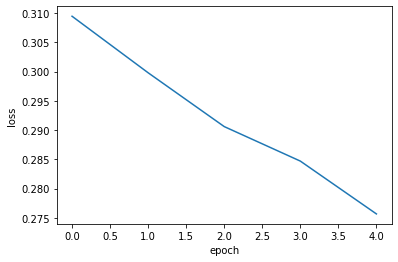

In [8]:
import matplotlib.pyplot as plt

# 손실 값을 그래프로 그린다.
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
# savefig()으로 그래프를 이미지로 저장한다.
# dpi(Dots per Inch)는 이미지의 해상도를 설정한다. 기본값은 dpi=100
plt.savefig('loss_epo5', dpi=300)
plt.show()

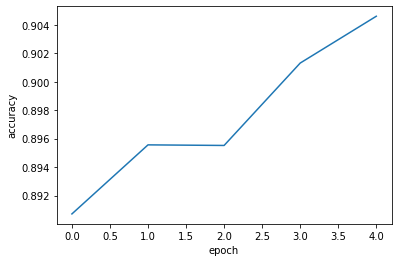

In [9]:
# 정확도를 그래프로 그린다.
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig('loss_epo5', dpi=300)
plt.show()

**1.5 에포크를 20으로 지정하고 훈련시키기**

In [10]:
# 함수를 호출하여 신경망 모델을 다시 생성한다.
model = model_fn()

# 에포크를 20으로 지정하고 훈련시킨다.
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

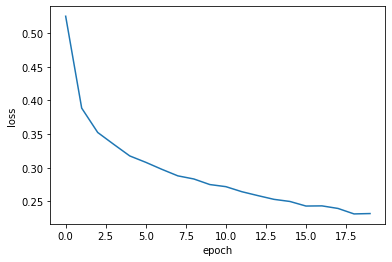

In [12]:
# 손실 값을 그래프로 그린다.
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('loss_epo20', dpi=300)
plt.show()

### 검증 손실
**2.1 에포크마다 검증 손실을 계산하기**

In [16]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

# fit()의 validation_data 매개변수에 검증에 사용할 입력과 타깃값을 전달한다.
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                      validation_data=(val_scaled, val_target))

In [18]:
# 반환된 history 객체의 history 딕셔너리에 어떤 값이 들어있는지 확인한다.
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### 3. 드롭아웃
**3.1 드롭아웃층 추가하기**

In [19]:
# 위에서 만든 model_fn()을 이용하여 30% 정도를 드롭아웃층으로 추가한다.
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output sealed.Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 드롭아웃 층을 추가하고 다시 신경망 모델을 훈련시킨다.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                      validation_data=(val_scaled, val_target))

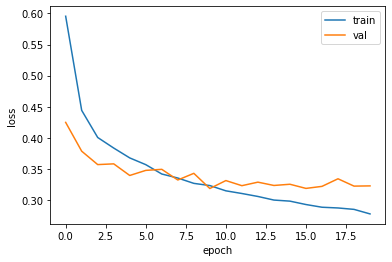

In [21]:
# 훈련 손실을 그래프로 그린다.
plt.plot(history.history['loss'])
# 손실 값을 그래프로 그린다.
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('dropout', dpi=300)
plt.show()